# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = "2051d59d3d0f253b7d3ae0612d5ae8d9"

url="http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
# Create empty lists to append the API data into lists 
city_name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temperature = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temperature.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=pangnirtung
Processing Record 2 | Obodivka
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=obodivka
Processing Record 3 | Morrope
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=morrope
City not found. Skipping...
Processing Record 4 | Shingu
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=shingu
Processing Record 5 | Fortuna
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=fortuna
Processing Record 6 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=cape town
Processing Record 7 | Akdepe
http://api.openweathermap.org/data/2.5/weather?appid=2051d59d3d0f253b7d3ae0612d5ae8d9&q=akdepe
Processing Record 8 | G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Clouds":clouds, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temperature": max_temperature,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_analysis = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_analysis.count()

City               573
Clouds             573
Country            573
Date               573
Humidity           573
Lat                573
Lng                573
Max Temperature    573
Wind Speed         573
dtype: int64

In [25]:
weather_analysis.to_csv('C:/Users/KXL0EN5/bootcamp/WeatherPyweather_analysis')

In [26]:
weather_analysis.head()

,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Pangnirtung,90,CA,1571180653,59,66.15,-65.72,273.15,0.283
1,Obodivka,0,UA,1571180654,73,49.63,26.02,284.45,4.065
2,Morrope,3,PE,1571180655,29,-6.54,-80.02,292.15,9.300
3,Shingu,20,JP,1571180657,63,33.72,135.99,290.15,2.100
4,Fortuna,1,US,1571180658,63,40.60,-124.16,295.93,5.100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

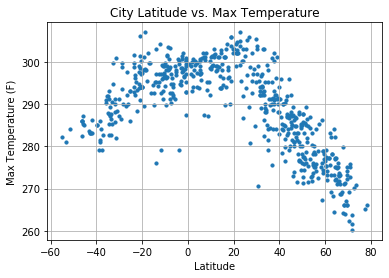

In [27]:
plt.scatter(weather_analysis["Lat"], weather_analysis["Max Temperature"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("C:/Users/KXL0EN5/bootcamp/Max_Temp_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

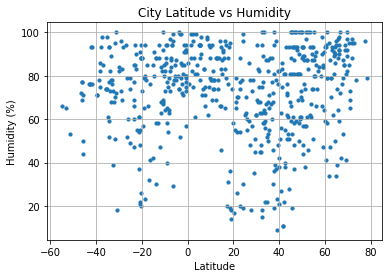

In [28]:
plt.scatter(weather_analysis["Lat"],weather_analysis["Humidity"],marker="o",s=10)
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("C:/Users/KXL0EN5/bootcamp/Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

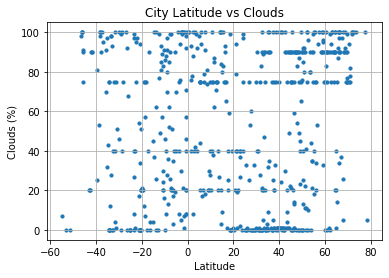

In [29]:
plt.scatter(weather_analysis["Lat"],weather_analysis["Clouds"],marker="o",s=10)
plt.title("City Latitude vs Clouds")
plt.ylabel("Clouds (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("C:/Users/KXL0EN5/bootcamp/City_Latitude_vs_Clouds")
plt.show()

#### Latitude vs. Wind Speed Plot

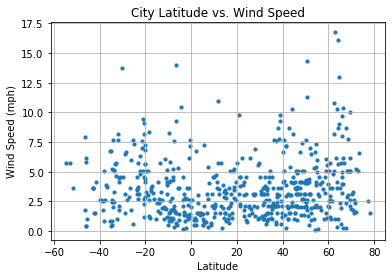

In [30]:
plt.scatter(weather_analysis["Lat"],weather_analysis["Wind Speed"], marker = "o",s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("C:/Users/KXL0EN5/bootcamp/City_Latitude_vs_Wind_Speed")
plt.show()